In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## define functions for calculation
def Normallization(trace, preframe):
    ts = np.array(trace)
    return ts/np.min(ts[:preframe])

def Mean_after(trace, preframe):
    nts = Normallization(trace, preframe)
    return (np.mean(nts[:preframe]), np.mean(nts[preframe:]))

def Mean_after_p(alltrace, preframe):
    from scipy import stats
    N = len(alltrace.columns) # number of samples in the data frame
    mbefore = []
    mafter = []
    mdifference = []
    for i in range(N):
        ts = alltrace.iloc[:,i]
        mean_before, mean_after = Mean_after(ts, preframe)
        mbefore.append(mean_before)
        mafter.append(mean_after)
        mdifference.append(mean_after - mean_before)
        del ts, mean_before, mean_after
    # Mann-Whitney test to see whether there is a difference between groups
    _, p = stats.mannwhitneyu(mbefore, mafter, use_continuity=True, alternative=None)
    # paired t test to see whether there is a difference between the before and after
    #_, p = stats.ttest_rel(mbefore, mafter, axis=0, nan_policy='propagate')
    # test whether the differences follow normal distribution
    #_, p = stats.shapiro(mdifference)
    # sign rank test to see the differences of median is 0
    #_, p = stats.wilcoxon(mbefore, mafter, zero_method='zsplit', alternative='greater')
    outcome = {}
    tmp1 = pd.DataFrame( data = mbefore, columns = ['normalized mean (A.U.)'] )
    tmp1['type'] = 'before'
    tmp2 = pd.DataFrame( data = mafter, columns = ['normalized mean (A.U.)'] )
    tmp2['type'] = 'after'
    outcome['raw'] = pd.concat([tmp1, tmp2])
    outcome['ratio'] = np.array(mafter)/np.array(mbefore)
    outcome['p'] = p
    return outcome


# Supp Fig 1C

0.47955038514293025
0.09459115496015047
0.32193394650892626
0.2995131918851508
0.313012352463981
0.37363162203094535
0.07877870789329405
0.45992488459532865


c:\users\yuezhe\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\yuezhe\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


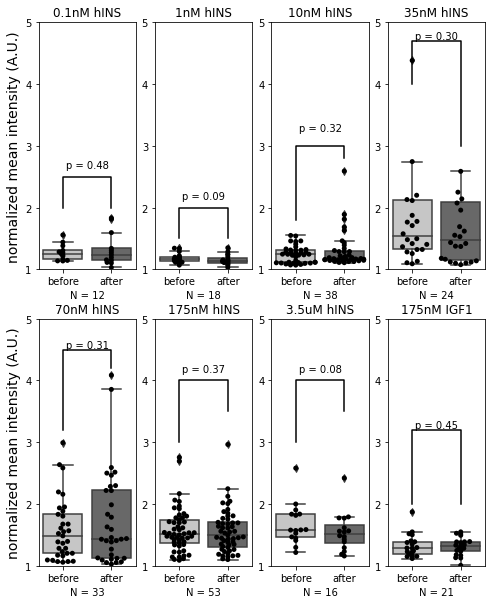

In [4]:

## input data

time_ins = np.array(range(241))

ins_point1 = pd.read_excel('hINS_titration.xlsx', sheet_name = 'INS=0.1nM', header = 1)
ins_1 = pd.read_excel('hINS_titration.xlsx', sheet_name = 'INS=1nM', header = 1)
ins_10 = pd.read_excel('hINS_titration.xlsx', sheet_name = 'INS=10nM', header = 1)
ins_35 = pd.read_excel('hINS_titration.xlsx', sheet_name = 'INS=35nM', header = 1)
ins_70 = pd.read_excel('hINS_titration.xlsx', sheet_name = 'INS=70nM', header = 1)
ins_175 = pd.read_excel('hINS_titration.xlsx', sheet_name = 'INS=175nM', header = 1)
ins_3500 = pd.read_excel('hINS_titration.xlsx', sheet_name = 'INS=3.5uM', header = 1)
higf1 = pd.read_excel('hINS_titration.xlsx', sheet_name = 'IGF1=175nM', header = 1)



# show p values

print(Mean_after_p(ins_point1, 120)['p'])
print(Mean_after_p(ins_1, 120)['p'])
print(Mean_after_p(ins_10, 120)['p'])
print(Mean_after_p(ins_35, 120)['p'])
print(Mean_after_p(ins_70, 120)['p'])
print(Mean_after_p(ins_175, 120)['p'])
print(Mean_after_p(ins_3500, 120)['p'])
print(Mean_after_p(higf1, 120)['p'])


# plot data

plt.figure(figsize = (8, 10))

plt.subplot(241)
sns.boxplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(ins_point1, 120)['raw'],  palette="Greys")
sns.swarmplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(ins_point1, 120)['raw'],  color="k")
plt.title('0.1nM hINS')
plt.ylim(ymax = 5, ymin = 1)
plt.plot([0, 0, 1, 1], [2, 2.5, 2.5, 2], lw=1.5, c='k')
plt.text(.5, 2.6, "p = 0.48", ha='center', va='bottom', color='k')
plt.ylabel('normalized mean intensity (A.U.)', fontsize = 14)
plt.yticks([1,2,3,4,5], ['1', '2', '3', '4', '5'])
plt.xlabel('N = 12')

plt.subplot(242)
sns.boxplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(ins_1, 120)['raw'],  palette="Greys")
sns.swarmplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(ins_1, 120)['raw'],  color="k")
plt.title('1nM hINS')
plt.ylim(ymax = 5, ymin = 1)
plt.plot([0, 0, 1, 1], [1.5, 2, 2, 1.5], lw=1.5, c='k')
plt.text(.5, 2.1, "p = 0.09", ha='center', va='bottom', color='k')
plt.ylabel(' ')
plt.yticks([1,2,3,4,5], ['1', '2', '3', '4', '5'])
plt.xlabel('N = 18')



plt.subplot(243)
sns.boxplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(ins_10, 120)['raw'],  palette="Greys")
sns.swarmplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(ins_10, 120)['raw'],  color="k")
plt.title('10nM hINS')
plt.ylim(ymax = 5, ymin = 1)
plt.plot([0, 0, 1, 1], [1.8, 3, 3, 2.8], lw=1.5, c='k')
plt.ylabel('normalized mean intensity (A.U.)', fontsize = 16)
plt.text(.5, 3.2, "p = 0.32", ha='center', va='bottom', color='k')
plt.ylabel('')
plt.yticks([1,2,3,4,5], ['1', '2', '3', '4', '5'])
plt.xlabel('N = 38')


plt.subplot(244)
sns.boxplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(ins_35, 120)['raw'],  palette="Greys")
sns.swarmplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(ins_35, 120)['raw'],  color="k")
plt.title('35nM hINS')
plt.ylim(ymax = 5, ymin = 1)
plt.ylabel('')
plt.plot([0, 0, 1, 1], [4, 4.7, 4.7, 3], lw=1.5, c='k')
plt.text(.5, 4.7, "p = 0.30", ha='center', va='bottom', color='k')
plt.yticks([1,2,3,4,5], ['1', '2', '3', '4', '5'])
plt.xlabel('N = 24')



plt.subplot(245)
sns.boxplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(ins_70, 120)['raw'],  palette="Greys")
sns.swarmplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(ins_70, 120)['raw'],  color="k")
plt.title('70nM hINS')
plt.ylim(ymax = 5, ymin = 1)
plt.ylabel('normalized mean intensity (A.U.)', fontsize = 14)
plt.plot([0, 0, 1, 1], [3.2, 4.5, 4.5, 4.2], lw=1.5, c='k')
plt.text(.5, 4.5, "p = 0.31", ha='center', va='bottom', color='k')
plt.yticks([1,2,3,4,5], ['1', '2', '3', '4', '5'])
plt.xlabel('N = 33')


plt.subplot(246)
sns.boxplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(ins_175, 120)['raw'],  palette="Greys")
sns.swarmplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(ins_175, 120)['raw'],  color="k")
plt.title('175nM hINS')
plt.ylim(ymax = 5, ymin = 1)
plt.plot([0, 0, 1, 1], [3, 4, 4, 3.5], lw=1.5, c='k')
plt.text(.5, 4.1, "p = 0.37", ha='center', va='bottom', color='k')
plt.ylabel('')
plt.yticks([1,2,3,4,5], ['1', '2', '3', '4', '5'])
plt.xlabel('N = 53')


plt.subplot(247)
sns.boxplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(ins_3500, 120)['raw'],  palette="Greys")
sns.swarmplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(ins_3500, 120)['raw'],  color="k")
plt.title('3.5uM hINS')
plt.ylim(ymax = 5, ymin = 1)
plt.plot([0, 0, 1, 1], [3, 4, 4, 3.5], lw=1.5, c='k')
plt.text(.5, 4.1, "p = 0.08", ha='center', va='bottom', color='k')
plt.ylabel('')
plt.yticks([1,2,3,4,5], ['1', '2', '3', '4', '5'])
plt.xlabel('N = 16')


plt.subplot(248)
sns.boxplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(higf1, 120)['raw'],  palette="Greys")
sns.swarmplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(higf1, 120)['raw'],  color="k")
plt.ylim(ymax = 5, ymin = 1)
plt.plot([0, 0, 1, 1], [2, 3.2, 3.2, 2], lw=1.5, c='k')
plt.text(.5, 3.2, "p = 0.45", ha='center', va='bottom', color='k')
plt.ylabel(' ')
plt.title('175nM IGF1')
plt.yticks([1,2,3,4,5], ['1', '2', '3', '4', '5'])
plt.xlabel('N = 21')

plt.show()


# Fig 2C

0.007692989166561485
0.006847229779300734
0.24959285620678778


c:\users\yuezhe\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\yuezhe\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


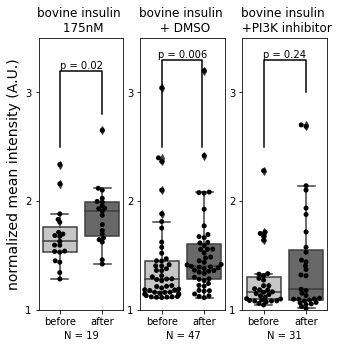

In [8]:
bins = pd.read_excel('bovine_insulin.xlsx', sheet_name = 'bovineINS=175nM', header = 1)   
dmso = pd.read_excel('bovine_insulin.xlsx', sheet_name = 'DMSO', header = 1)
ly = pd.read_excel('bovine_insulin.xlsx', sheet_name = 'LY294002', header = 1)

time_glu = np.array(range(241)) # time in seconds

print(Mean_after_p(bins, 120)['p'])
print(Mean_after_p(dmso, 120)['p'])
print(Mean_after_p(ly, 120)['p'])



plt.figure(figsize=(7,5))

plt.subplot(142)
sns.boxplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(bins, 120)['raw'],  palette="Greys")
sns.swarmplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(bins, 120)['raw'],  color="k")
plt.ylim(ymax = 3.5, ymin = 1)
plt.plot([0, 0, 1, 1], [2.5, 3.2, 3.2, 2.8], lw=1.5, c='k')
plt.text(.5, 3.2, "p = 0.02", ha='center', va='bottom', color='k')
plt.ylabel('normalized mean intensity (A.U.)', fontsize = 14)
plt.title('bovine insulin \n 175nM')
plt.xlabel('N = 19')
plt.yticks([1,2,3], ['1','2','3'])

plt.subplot(143)
sns.boxplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(dmso, 120)['raw'],  palette="Greys")
sns.swarmplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(dmso, 120)['raw'],  color="k")
plt.ylim(ymax = 3.5, ymin = 1)
plt.title('bovine insulin \n + DMSO')
plt.plot([0, 0, 0.95, 0.95], [2.5, 3.3, 3.3, 2.5], lw=1.5, c='k')
plt.text(.5, 3.3, "p = 0.006", ha='center', va='bottom', color='k')
plt.ylabel(' ')
plt.xlabel('N = 47')
plt.yticks([1,2,3], ['1','2','3'])



plt.subplot(144)
sns.boxplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(ly, 120)['raw'],  palette="Greys")
sns.swarmplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(ly, 120)['raw'],  color="k")
plt.title('bovine insulin \n +PI3K inhibitor')
plt.ylim(ymax = 3.5, ymin = 1)
plt.plot([0, 0, 1, 1], [2.5, 3.3, 3.3, 3], lw=1.5, c='k')
plt.text(.5, 3.3, "p = 0.24", ha='center', va='bottom', color='k')
plt.ylabel(' ')
plt.xlabel('N = 31')
plt.yticks([1,2,3], ['1','2','3'])


plt.show()

# Fig 2F

0.4180968674112305
0.0030485711725869737


c:\users\yuezhe\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


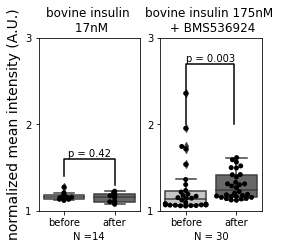

In [11]:
## read in data 

time_ins = np.array(range(241))/240 # time in seconds

bms = pd.read_excel('bovine_insulin.xlsx', sheet_name = 'BMS536924', header = 1)
low_bins = pd.read_excel('bovine_insulin.xlsx', sheet_name = 'MIN6-1V59-BovineIns_17.5nM', header = 1)



## analysis between whether hIGF1 changes calcium concentration before and after stimulation

print(Mean_after_p(low_bins, 120)['p'])

print(Mean_after_p(bms, 120)['p'])


plt.figure(figsize = (4, 7))


plt.subplot(221)
sns.boxplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(low_bins, 120)['raw'],  palette="Greys")
sns.swarmplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(low_bins, 120)['raw'],  color="k")
plt.ylim([1,3])
plt.title('bovine insulin \n 17nM')
plt.plot([0, 0, 1, 1], [1.4, 1.6, 1.6, 1.3], lw=1.5, c='k')
plt.text(.5, 1.6, "p = 0.42", ha='center', va='bottom', color='k')
plt.ylabel('normalized mean intensity (A.U.)', fontsize = 14)
plt.yticks([1,2,3], ['1', '2', '3'])
plt.xlabel('N =14')

plt.subplot(222)
sns.boxplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(bms, 120)['raw'],  palette="Greys")
sns.swarmplot(x = 'type', y = 'normalized mean (A.U.)', data = Mean_after_p(bms, 120)['raw'],  color="k")
plt.ylim(ymax = 3, ymin = 1)
plt.ylabel(' ')
plt.title('bovine insulin 175nM \n + BMS536924')
plt.plot([0, 0, 0.95, 0.95], [2, 2.7, 2.7, 2], lw=1.5, c='k')
plt.text(.5, 2.7, "p = 0.003", ha='center', va='bottom', color='k')
plt.yticks([1,2,3], ['1', '2', '3'])
plt.xlabel('N = 30')

plt.show()
